In [14]:
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
#Supress default INFO logging
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
import logging, sys
logging.disable(sys.maxsize)
from fbprophet.diagnostics import cross_validation

from fbprophet.plot import add_changepoints_to_plot

In [5]:
df = pd.read_csv('BITCOIN_PRICES_LAST_5_YEARS.csv', usecols=('Date', 'Close'))

In [6]:
df = df.rename(columns={'Date':'ds', 'Close': 'y'})
df.columns = df.columns.astype(str)
df['ds'] = pd.to_datetime(df['ds'])
# df = df.set_index(['ts'], drop=True)
# df.index= pd.to_datetime(df.index)

In [7]:
df

,ds,y
0,2017-07-03,2567.00000
1,2017-07-04,2602.27000
2,2017-07-05,2602.12000
3,2017-07-06,2610.60000
4,2017-07-07,2520.75000
...,...,...
1820,2022-06-27,20732.98340
1821,2022-06-28,20293.45080
1822,2022-06-29,20101.12000
1823,2022-06-30,19816.74636


<Figure size 432x288 with 0 Axes>

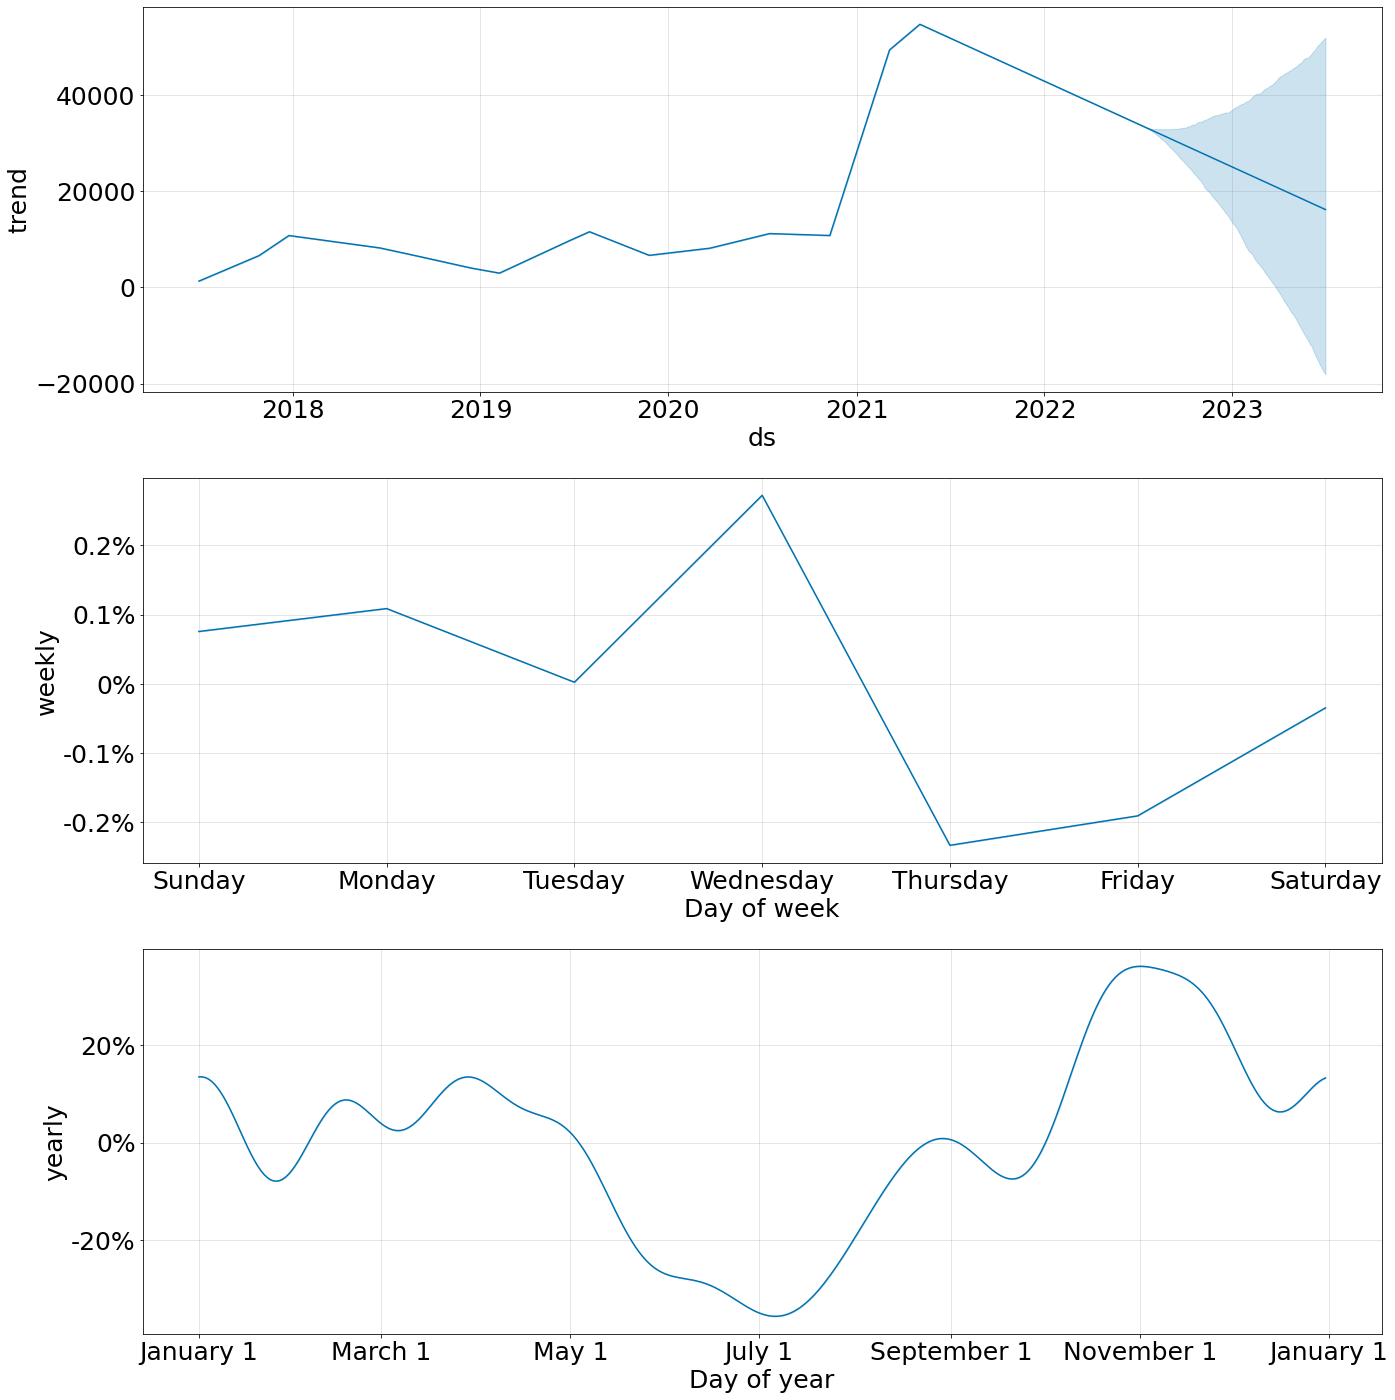

In [47]:
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=365, freq='D')
fcst = m.predict(future)
plt.figure()
plt.rcParams.update({'font.size': 25})

fig = m.plot_components(fcst, figsize=(20,20))


In [10]:


fcst[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
1880,2022-08-26,31304.556268,27643.315649,34769.988442
1881,2022-08-27,31370.615688,28010.797031,34916.327768
1882,2022-08-28,31400.734728,27882.884973,34918.367939
1883,2022-08-29,31384.972675,27769.562275,34770.677330
1884,2022-08-30,31304.173310,28038.206339,34881.616337


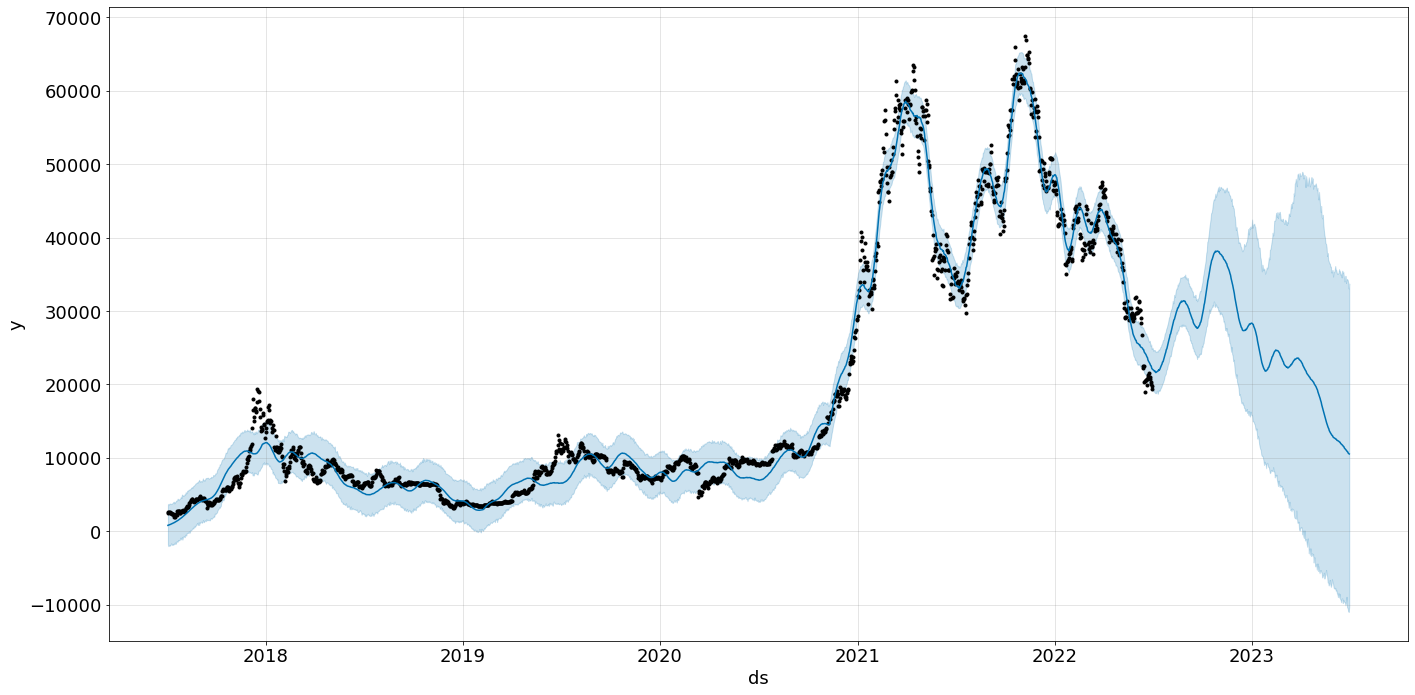

In [46]:
# fig = plt.figure(figsize=(20, 10))
# ax = fig.add_subplot(111)
fig= m.plot(fcst,figsize=(20,10))
# a = add_changepoints_to_plot(fig.gca(), m, fcst, threshold=0.9, cp_color='g')

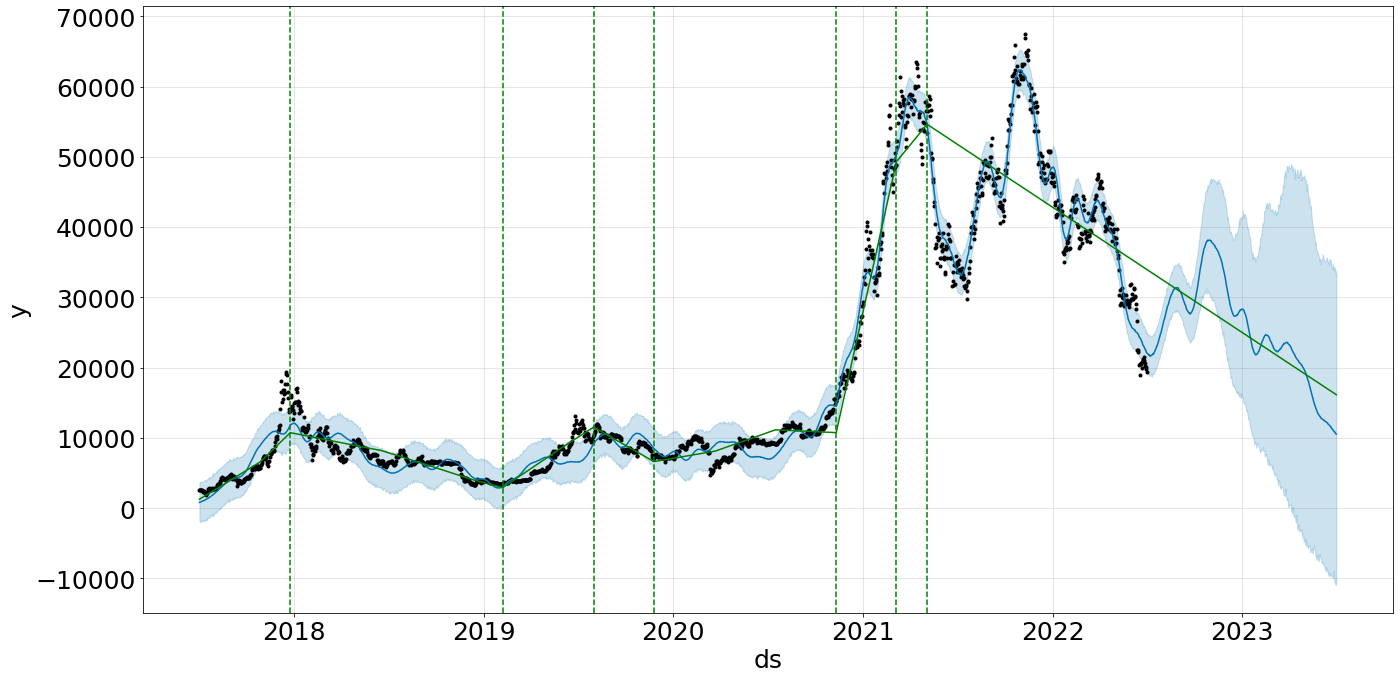

In [36]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax = m.plot(fcst,figsize=(20,10))
a = add_changepoints_to_plot(fig.gca(), m, fcst, threshold=0.9, cp_color='g')

In [40]:
cv_results = cross_validation( model = m, initial = pd.to_timedelta(1000, unit="d"), period="7 days", horizon = pd.to_timedelta(365,unit="d"))

<Figure size 432x288 with 0 Axes>

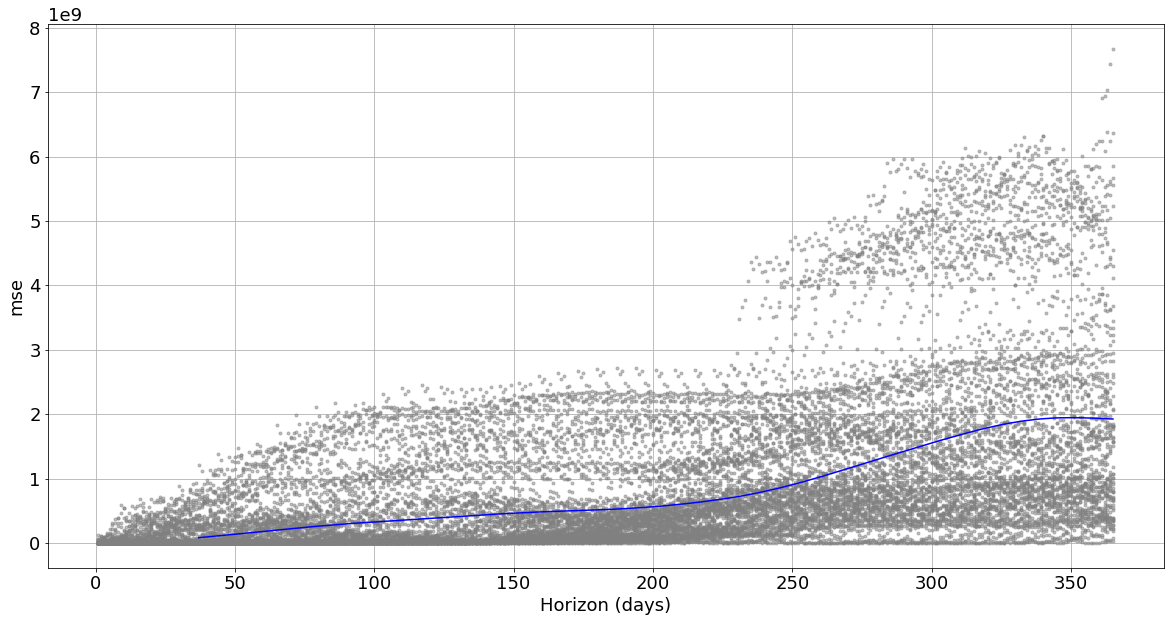

In [41]:
from fbprophet.plot import plot_cross_validation_metric
plt.figure()
plt.rcParams.update({'font.size': 18})
fig = plot_cross_validation_metric(cv_results, metric='mse', figsize=(20,10))

<Figure size 432x288 with 0 Axes>

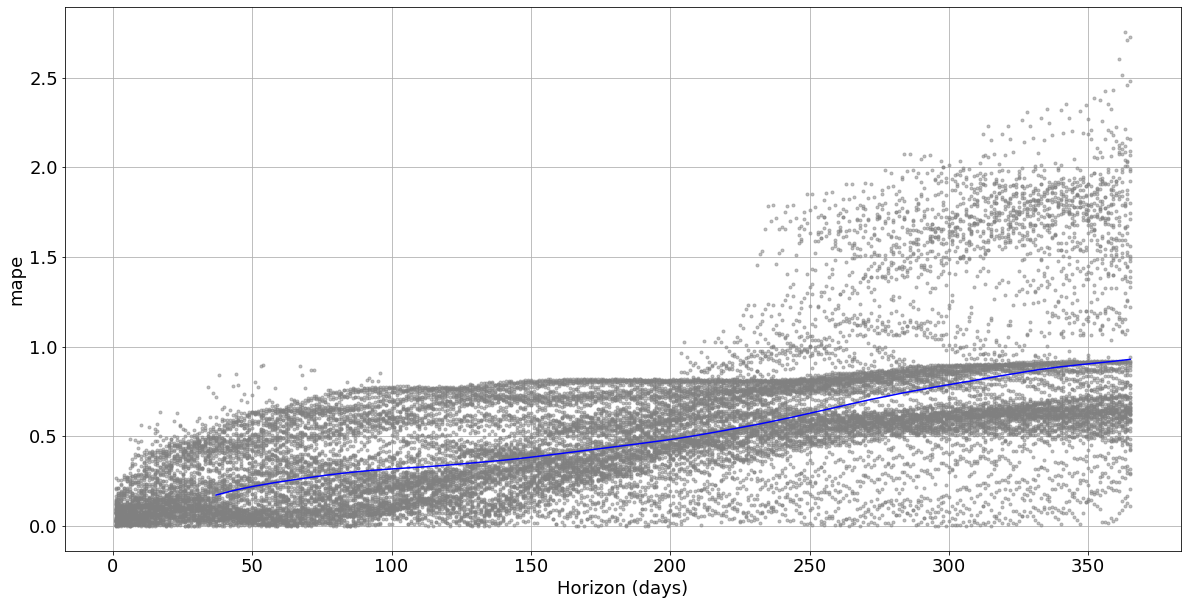

In [43]:
from fbprophet.plot import plot_cross_validation_metric
plt.figure()
plt.rcParams.update({'font.size': 18})
fig = plot_cross_validation_metric(cv_results, metric='mape', figsize=(20,10))